# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

# SGD

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

Epoch 48/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.4656 - acc: 0.4842 - val_loss: 1.6603 - val_acc: 0.4289
Epoch 49/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.4624 - acc: 0.4849 - val_loss: 1.6680 - val_acc: 0.4192
Epoch 50/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.4672 - acc: 0.4831 - val_loss: 1.6712 - val_acc: 0.4194
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)   

50000/50000 [==============================] - 9s 187us/step - loss: 0.3805 - acc: 0.8631 - val_loss: 2.2128 - val_acc: 0.5327
Epoch 50/50
50000/50000 [==============================] - 9s 180us/step - loss: 0.3672 - acc: 0.8687 - val_loss: 2.2533 - val_acc: 0.5230
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)     

50000/50000 [==============================] - 9s 188us/step - loss: 0.8708 - acc: 0.6947 - val_loss: 1.5303 - val_acc: 0.5117
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 183us/step - loss: 2.3534 - acc: 0.1208 - val_loss: 2.3051 - val_acc: 0.1348
Epoch 2/50
50000/50000 [==============================] - 9s 179us/step - loss: 2.2925 - acc: 0.1429 - val_loss: 2.2789 - val_acc: 0.1509
Epoch 3/50
50000/50000 [==============================] - 9s 179us/step - loss: 2.2729 - acc: 0.1568 - val_loss: 2.2629 - val_acc: 0.1698
Epoch 4/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.2581 - acc: 0.1742 - val_loss: 2.2492 - val_acc: 0.1811
Epoch 5/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.2450 - acc: 0.1858 - val_loss: 2.2369 - val_acc: 0.1958
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.2330 - acc: 0.1974 - val_loss: 2.2253 - val_acc: 0.2051
Epoch 7/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.2216 - acc: 0.2062 - val_loss: 2.2144 - 

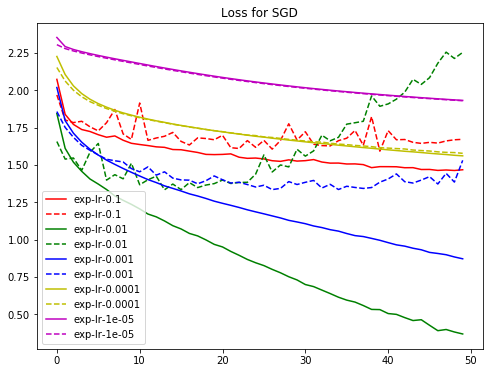

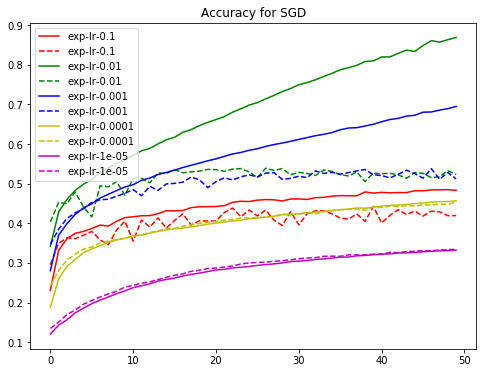

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss for SGD")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy for SGD")
plt.legend()
plt.show()


# RMSprop

In [16]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 220us/step - loss: 14.4459 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 13s 254us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 11s 221us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 12s 244us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 11s 213us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 207us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 11s 211us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 11s 218us/step - loss: 2.3043 - acc: 0.2137 - val_loss: 2.0385 - val_acc: 0.2623
Epoch 2/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.8878 - acc: 0.3180 - val_loss: 1.8454 - val_acc: 0.3477
Epoch 3/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.7790 - acc: 0.3610 - val_loss: 1.6735 - val_acc: 0.4105
Epoch 4/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.7125 - acc: 0.3876 - val_loss: 1.8363 - val_acc: 0.3434
Epoch 5/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.6508 - acc: 0.4093 - val_loss: 1.6309 - val_acc: 0.4192
Epoch 6/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.6084 - acc: 0.4268 - val_loss: 1.5862 - val_acc: 0.4354
Epoch 7/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.5633 - acc: 0.4425 - val_loss: 1.6162 - val_acc: 0.4243
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7904 - acc: 0.3640 - val_loss: 1.9321 - val_acc: 0.3150
Epoch 3/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.7111 - acc: 0.3932 - val_loss: 1.8168 - val_acc: 0.3403
Epoch 4/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.6537 - acc: 0.4157 - val_loss: 1.6309 - val_acc: 0.4222
Epoch 5/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.6104 - acc: 0.4301 - val_loss: 1.6514 - val_acc: 0.4111
Epoch 6/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5766 - acc: 0.4438 - val_loss: 1.6197 - val_acc: 0.4276
Epoch 7/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.5416 - acc: 0.4558 - val_loss: 1.5393 - val_acc: 0.4553
Epoch 8/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.5151 - acc: 0.4665 - val_loss: 1.5058 - val_acc: 0.4620
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.8750 - acc: 0.3510 - val_loss: 1.8466 - val_acc: 0.3613
Epoch 4/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.8269 - acc: 0.3682 - val_loss: 1.8101 - val_acc: 0.3762
Epoch 5/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.7924 - acc: 0.3792 - val_loss: 1.7819 - val_acc: 0.3749
Epoch 6/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7643 - acc: 0.3883 - val_loss: 1.7586 - val_acc: 0.3901
Epoch 7/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7418 - acc: 0.3961 - val_loss: 1.7340 - val_acc: 0.3977
Epoch 8/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.7208 - acc: 0.4014 - val_loss: 1.7234 - val_acc: 0.3951
Epoch 9/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.7025 - acc: 0.4090 - val_loss: 1.7041 - val_acc: 0.4060
Epoch 10/50
50000/50000 [==

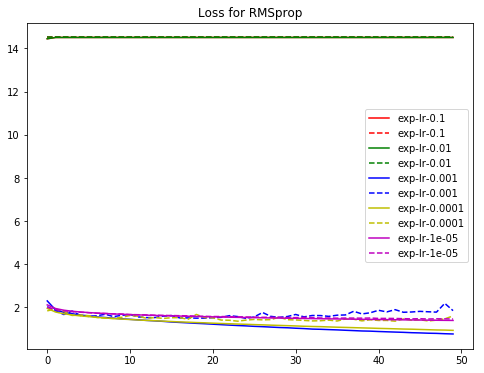

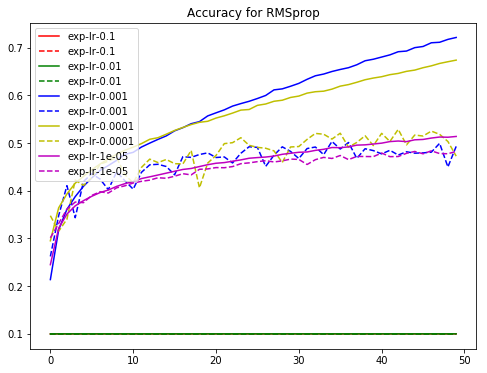

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss for RMSprop")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy for RMSprop")
plt.legend()
plt.show()


# AdaGrad

In [21]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 205us/step - loss: 14.4467 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 200us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 10s 196us/step - loss: 14.4907 - acc: 0.1004 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 10s 197us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 195us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 197us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 10s 198us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 14s 282us/step - loss: 1.9943 - acc: 0.2827 - val_loss: 1.8994 - val_acc: 0.3090
Epoch 2/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.8079 - acc: 0.3601 - val_loss: 1.7979 - val_acc: 0.3553
Epoch 3/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.7321 - acc: 0.3899 - val_loss: 1.7352 - val_acc: 0.3772
Epoch 4/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.6801 - acc: 0.4096 - val_loss: 1.6733 - val_acc: 0.4123
Epoch 5/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6432 - acc: 0.4256 - val_loss: 1.6472 - val_acc: 0.4103
Epoch 6/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.6139 - acc: 0.4340 - val_loss: 1.6558 - val_acc: 0.4055
Epoch 7/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.5890 - acc: 0.4441 - val_loss: 1.6058 - val_acc: 0.4371
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 12s 232us/step - loss: 2.0533 - acc: 0.2720 - val_loss: 1.9781 - val_acc: 0.3036
Epoch 2/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9388 - acc: 0.3201 - val_loss: 1.9147 - val_acc: 0.3245
Epoch 3/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.8942 - acc: 0.3397 - val_loss: 1.8811 - val_acc: 0.3394
Epoch 4/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.8651 - acc: 0.3496 - val_loss: 1.8553 - val_acc: 0.3449
Epoch 5/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.8436 - acc: 0.3582 - val_loss: 1.8396 - val_acc: 0.3543
Epoch 6/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.8274 - acc: 0.3655 - val_loss: 1.8266 - val_acc: 0.3516
Epoch 7/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.8138 - acc: 0.3697 - val_loss: 1.8108 - val_acc: 0.3612
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 13s 256us/step - loss: 2.2819 - acc: 0.1449 - val_loss: 2.2549 - val_acc: 0.1686
Epoch 2/50
50000/50000 [==============================] - 18s 370us/step - loss: 2.2373 - acc: 0.1873 - val_loss: 2.2257 - val_acc: 0.1976
Epoch 3/50
50000/50000 [==============================] - 14s 287us/step - loss: 2.2135 - acc: 0.2067 - val_loss: 2.2061 - val_acc: 0.2140
Epoch 4/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.1959 - acc: 0.2195 - val_loss: 2.1901 - val_acc: 0.2261
Epoch 5/50
50000/50000 [==============================] - 17s 342us/step - loss: 2.1811 - acc: 0.2292 - val_loss: 2.1765 - val_acc: 0.2328
Epoch 6/50
50000/50000 [==============================] - 14s 289us/step - loss: 2.1684 - acc: 0.2361 - val_loss: 2.1644 - val_acc: 0.2403
Epoch 7/50
50000/50000 [==============================] - 18s 368us/step - loss: 2.1572 - acc: 0.2436 - val_loss: 2.1539 - val_acc: 0.2455
Epoch 8/50
50000/50000 [==============

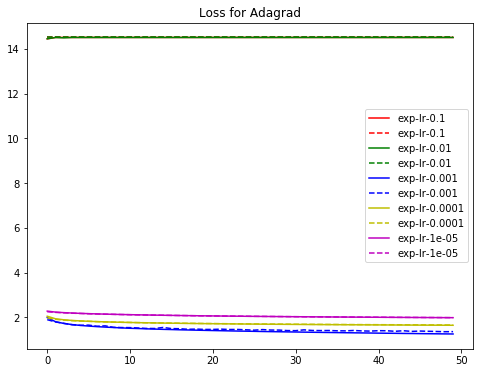

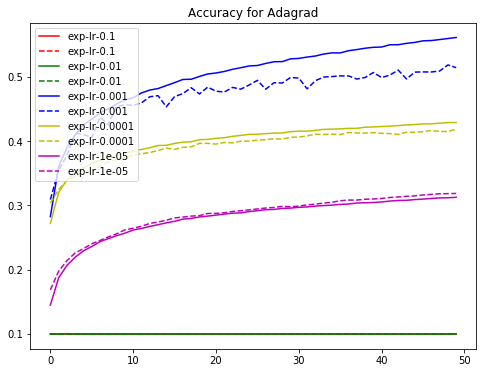

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss for Adagrad")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy for Adagrad")
plt.legend()
plt.show()

# Adam

In [25]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

50000/50000 [==============================] - 14s 277us/step - loss: 0.6463 - acc: 0.7692 - val_loss: 1.7686 - val_acc: 0.5218
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________________________________________

Experiment with LR = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

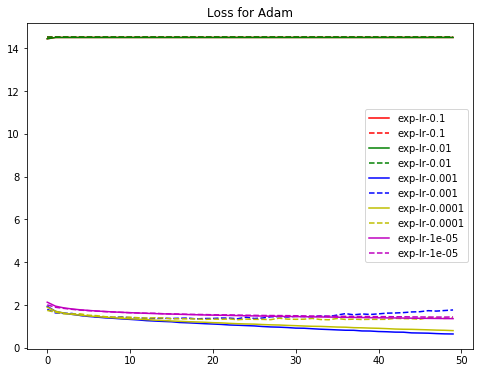

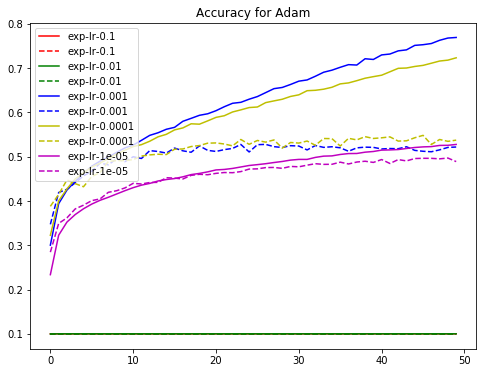

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss for Adam")
plt.legend()
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy for Adam")
plt.legend()
plt.show()